## Chart 3.4 The movies comments categorized: The either categorized

### Part 3.4.1 IMDB dataset

In [4]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence)for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [8]:
reverse_word_index = dict(
    [(value, key)for (key, value)in word_index.items()])

In [9]:
decode_review = ''.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

### 3.4.2 Ready data

In [10]:
import numpy as np

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
y_test[0]

0.0

### 3.4.3 Build network

In [16]:
from keras import models
from keras import layers

# code list 3-3 define the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [17]:
# code list 3-4 compile model
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [18]:
# code list 3-5 assign the optimizers
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
# code list 3-6 Use customization loss rate and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### 3.4.4 Verifying your methods

In [20]:
# code list 3-7 assigned validation_data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
# code list 3-8 training model
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5204 - acc: 0.7756 - val_loss: 0.4055 - val_acc: 0.8617
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3144 - acc: 0.9033 - val_loss: 0.3233 - val_acc: 0.8777
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2295 - acc: 0.9281 - val_loss: 0.2809 - val_acc: 0.8902
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1785 - acc: 0.9455 - val_loss: 0.2797 - val_acc: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1489 - acc: 0.9530 - val_loss: 0.2810 - val_acc: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1244 - acc: 0.9626 - val_loss: 0.2917 - val_acc: 0.8846
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1000 - acc: 0.9723 - val_loss: 0.3154 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0850 - a

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

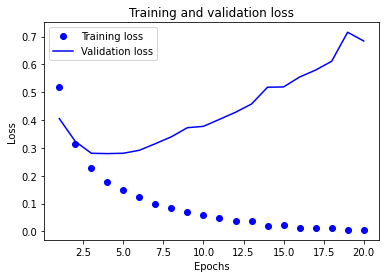

In [27]:
# code list 3-9 Plot the training loss and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

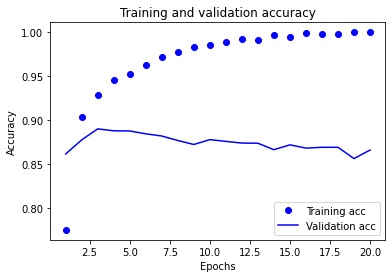

In [28]:
# code list 3-10 plot training accuracy and validation accuracy
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4656 - accuracy: 0.8177
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2663 - accuracy: 0.9073
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2030 - accuracy: 0.9279
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2962 - accuracy: 0.8833


In [32]:
results

[0.29622551798820496, 0.8833199739456177]

### 3.4.5 It's make to predict results in new data use the pretrain network

In [33]:
model.predict(x_test)

array([[0.16683361],
       [0.9978856 ],
       [0.7770517 ],
       ...,
       [0.07871899],
       [0.04112282],
       [0.6139545 ]], dtype=float32)

### 3.4.6 Further experiment

In [53]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 21ms/step - loss: 0.4276 - accuracy: 0.8140
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2383 - accuracy: 0.9068
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.1796 - accuracy: 0.9334
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.4190 - accuracy: 0.8554


In [51]:
results

[0.094815194606781, 0.8774399757385254]